In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Generate dataset

In [2]:
y = np.random.randint(0,10,5000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 481
1 487
2 481
3 471
4 498
5 566
6 484
7 521
8 485
9 526


In [3]:
x = np.zeros((5000,2))
x1 = np.zeros((5000,2))

In [4]:
x[idx[0],:] = np.random.multivariate_normal(mean = [2,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))
x1[idx[0],:] = np.random.multivariate_normal(mean = [0,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))

x[idx[1],:] = np.random.multivariate_normal(mean = [-15,-7],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))
x1[idx[1],:] = np.random.multivariate_normal(mean = [-5,15],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))

x[idx[2],:] = np.random.multivariate_normal(mean = [4,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))
x1[idx[2],:] = np.random.multivariate_normal(mean = [-10,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))


x[idx[3],:] = np.random.multivariate_normal(mean = [-5,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))
x1[idx[3],:] = np.random.multivariate_normal(mean = [-20,10],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))

x[idx[4],:] = np.random.multivariate_normal(mean =[-8,10] ,cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))
x1[idx[4],:] = np.random.multivariate_normal(mean = [10,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))


x[idx[5],:] = np.random.multivariate_normal(mean = [-15,6],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))
x1[idx[5],:] = np.random.multivariate_normal(mean = [0,2],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))

x[idx[6],:] = np.random.multivariate_normal(mean = [2,-18],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))
x1[idx[6],:] = np.random.multivariate_normal(mean = [7,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [10,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))
x1[idx[7],:] = np.random.multivariate_normal(mean = [-8,-11],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))

x[idx[8],:] = np.random.multivariate_normal(mean = [-10,-15],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))
x1[idx[8],:] = np.random.multivariate_normal(mean = [10,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))

x[idx[9],:] = np.random.multivariate_normal(mean = [15,8],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))
x1[idx[9],:] = np.random.multivariate_normal(mean = [2,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))

In [5]:
x,y = np.concatenate((x,x1),axis=0),np.concatenate((y,y),axis=0)
x.shape,y.shape

((10000, 2), (10000,))

In [6]:
# y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    #print(i,sum(y==i))
    idx.append(y==i)

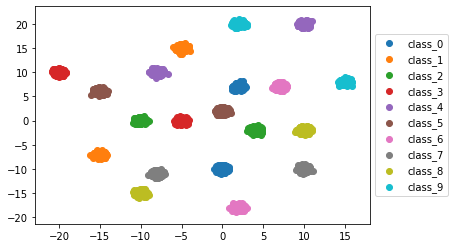

In [7]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
foreground_classes = {'class_0','class_1', 'class_2'}

background_classes = {'class_3','class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [9]:
fg_class  = np.random.randint(0,3)
fg_idx = np.random.randint(0,9)

a = []
for i in range(9):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(3,10)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
print(a.shape)

print(fg_class , fg_idx)

background 9 present at 0
background 7 present at 1
foreground 2 present at 2
background 5 present at 3
background 5 present at 4
background 3 present at 5
background 7 present at 6
background 8 present at 7
background 9 present at 8
(9, 2)
2 2


In [10]:
a.shape

(9, 2)

In [11]:
np.reshape(a,(18,1))

array([[ 14.6453203 ],
       [  7.65909052],
       [ -7.82294746],
       [-10.64563783],
       [ -9.92525999],
       [  0.12514378],
       [-15.00429342],
       [  6.65314123],
       [  0.12106897],
       [  1.65424678],
       [-19.5139418 ],
       [ 10.03333406],
       [  9.64229453],
       [-10.54182715],
       [-10.19298075],
       [-14.58763106],
       [  2.92057055],
       [ 19.62741949]])

In [12]:
a=np.reshape(a,(3,6))

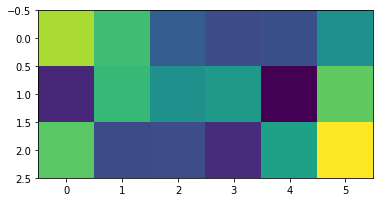

In [13]:
plt.imshow(a)

In [14]:
desired_num = 3000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(18,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [15]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[ -5.15150082  -0.58453866   9.89311621 ... -10.19926361   0.22988374
    1.49070214]
 [ -7.58615763 -10.96225671   2.15488361 ...  10.20808723   2.34204175
  -18.21910744]
 [ -4.69954492  14.805758    14.52062412 ...   1.97526495  14.56012443
    8.25017028]
 ...
 [-20.35877667   9.68336143   7.15843421 ...  -9.84420754   7.85237498
    6.93535743]
 [ 14.66139248   8.16805529   1.88457979 ...   1.76954413  -8.09313643
    9.92823002]
 [  7.5043602    6.9616231    1.5616328  ...   9.45802011  -8.28187484
   10.23624787]]


In [16]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(3000,)
(3000,)


In [17]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [18]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(2,16)
        self.linear2 = nn.Linear(16,32)
        self.linear3 = nn.Linear(32,1)
    def forward(self,z):
        x = torch.zeros([batch,9],dtype=torch.float64)
        y = torch.zeros([batch,2], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(9):
            x[:,i] = self.helper(z[:,2*i:2*i+2])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(9):
            x1 = x[:,i]          
            #print()
            y = y+torch.mul(x1[:,None],z[:,2*i:2*i+2])
        return y , x 

    
    def helper(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

    

In [19]:
trainiter = iter(train_loader)
input1,labels1,index1 = trainiter.next()



In [20]:
where = Wherenet().double()
where = where
out_where,alphas = where(input1)
out_where.shape,alphas.shape

(torch.Size([250, 2]), torch.Size([250, 9]))

In [21]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(2,8)
        self.linear2 = nn.Linear(8,16)
        self.linear3 = nn.Linear(16,3)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [22]:
what = Whatnet().double()
what(out_where)

tensor([[-2.1658e-01, -4.9532e-02,  7.4871e-01],
        [ 3.0443e-01, -2.0989e-01, -1.3230e-01],
        [-1.3369e-01,  3.6189e-02,  4.5209e-01],
        [ 2.8169e-01, -1.9599e-01, -1.3474e-01],
        [-1.3170e-01, -2.2071e-01,  8.7930e-01],
        [-1.3403e-01,  6.2087e-02,  3.8555e-01],
        [-1.6244e-01, -3.8490e-01,  1.3603e+00],
        [-1.3336e-01, -1.5735e-01,  9.1900e-01],
        [ 3.3084e-01, -2.6217e-01, -1.8703e-01],
        [ 2.4495e-01, -1.7450e-01, -9.3421e-02],
        [-1.2215e-01,  1.8044e-02,  4.4980e-01],
        [ 2.8968e-01, -1.5205e-01, -7.8241e-02],
        [ 3.4525e-01, -2.7675e-01, -2.8752e-01],
        [-1.3246e-01, -8.0117e-02,  7.4656e-01],
        [ 3.3268e-01, -1.1828e-01, -2.9233e-02],
        [-1.7823e-01, -2.0434e-01,  1.0829e+00],
        [-1.4343e-01, -2.3485e-01,  9.6833e-01],
        [-3.5143e-02,  1.2829e-02,  2.9953e-01],
        [-1.4011e-01, -2.7581e-01,  1.1111e+00],
        [-2.0052e-01, -8.0481e-02,  8.3275e-01],
        [-1.4094e-01

In [23]:
test_data_required = 1000
mosaic_list_test =[]
mosaic_label_test = []
fore_idx_test=[]
for j in range(test_data_required):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_test.append(np.reshape(a,(18,1)))
    mosaic_label_test.append(fg_class)
    fore_idx_test.append(fg_idx)

In [24]:
mosaic_list_test = np.concatenate(mosaic_list_test,axis=1).T
print(mosaic_list_test.shape)

(1000, 18)


In [25]:
test_data = MosaicDataset(mosaic_list_test,mosaic_label_test,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [26]:
every_what_epoch = 200
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 400

train_loss=[]
test_loss =[]
train_acc = []
test_acc = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times

    focus_true_pred_true =0
    focus_false_pred_true =0
    focus_true_pred_false =0
    focus_false_pred_false =0

    argmax_more_than_half = 0
    argmax_less_than_half =0

    running_loss = 0.0
    cnt=0

    iteration = desired_num // batch
    
    if (epoch % (every_what_epoch*2) ) < every_what_epoch :
        print(epoch,"updating where_net, what_net is freezed") 
    elif (epoch % (every_what_epoch*2)) > every_what_epoch :
        print(epoch,"updating what_net, where_net is freezed")

    #training data set

    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device)
        # zero the parameter gradients

        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        
        avg_inp,alphas = where(inputs)
        
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels) 
        loss.backward() 
        if (epoch % (every_what_epoch*2) ) < every_what_epoch :
            optimizer_where.step()
          
        elif (epoch % (every_what_epoch*2)) > every_what_epoch :
            optimizer_what.step()
        

        running_loss += loss.item()
        if cnt % 6 == 5:    # print every 6 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 6))
            running_loss = 0.0
        cnt=cnt+1
    
        if epoch % 5 == 4:
            for j in range (batch):
                focus = torch.argmax(alphas[j])

                if(alphas[j][focus] >= 0.5):
                    argmax_more_than_half +=1
                else:
                    argmax_less_than_half +=1

                if(focus == fore_idx[j] and predicted[j] == labels[j]):
                    focus_true_pred_true += 1

                elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                    focus_false_pred_true +=1

                elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                    focus_true_pred_false +=1

                elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                    focus_false_pred_false +=1

    if epoch % 5 == 4:
        col1.append(epoch)
        col2.append(argmax_more_than_half)
        col3.append(argmax_less_than_half)
        col4.append(focus_true_pred_true)
        col5.append(focus_false_pred_true)
        col6.append(focus_true_pred_false)
        col7.append(focus_false_pred_false)

    #************************************************************************
        #testing data set  
        with torch.no_grad():
            focus_true_pred_true =0
            focus_false_pred_true =0
            focus_true_pred_false =0
            focus_false_pred_false =0

            argmax_more_than_half = 0
            argmax_less_than_half =0
            for data in test_loader:
                inputs, labels , fore_idx = data
                #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device) 
#                 print(inputs.shtorch.save(where.state_dict(),"model_epoch"+str(epoch)+".pt")ape,labels.shape)
                avg_inp,alphas = where(inputs)
                outputs = what(avg_inp)
                _, predicted = torch.max(outputs.data, 1)

                for j in range (batch):
                    focus = torch.argmax(alphas[j])

                    if(alphas[j][focus] >= 0.5):
                        argmax_more_than_half +=1
                    else:
                        argmax_less_than_half +=1

                    if(focus == fore_idx[j] and predicted[j] == labels[j]):
                        focus_true_pred_true += 1

                    elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                        focus_false_pred_true +=1

                    elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                        focus_true_pred_false +=1

                    elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                        focus_false_pred_false +=1

        col8.append(argmax_more_than_half)
        col9.append(argmax_less_than_half)
        col10.append(focus_true_pred_true)
        col11.append(focus_false_pred_true)
        col12.append(focus_true_pred_false)
        col13.append(focus_false_pred_false)
        if (epoch % (every_what_epoch*2) == every_what_epoch*2 - 1):
            torch.save(where.state_dict(),"Alternate_weights/where_model_at_epoch"+str(epoch)+".pt")
            torch.save(what.state_dict(),"Alternate_weights/what_model_at_epoch"+str(epoch)+".pt")
    
print('Finished Training')
torch.save(where.state_dict(),"full_where_model_epoch"+str(nos_epochs)+".pt")
torch.save(what.state_dict(),"full_what_model_epoch"+str(nos_epochs)+".pt")

0 updating where_net, what_net is freezed
[1,     6] loss: 1.158
[1,    12] loss: 1.157
1 updating where_net, what_net is freezed
[2,     6] loss: 1.141
[2,    12] loss: 1.152
2 updating where_net, what_net is freezed
[3,     6] loss: 1.141
[3,    12] loss: 1.134
3 updating where_net, what_net is freezed
[4,     6] loss: 1.140
[4,    12] loss: 1.127
4 updating where_net, what_net is freezed
[5,     6] loss: 1.135
[5,    12] loss: 1.127
5 updating where_net, what_net is freezed
[6,     6] loss: 1.130
[6,    12] loss: 1.129
6 updating where_net, what_net is freezed
[7,     6] loss: 1.128
[7,    12] loss: 1.127
7 updating where_net, what_net is freezed
[8,     6] loss: 1.130
[8,    12] loss: 1.119
8 updating where_net, what_net is freezed
[9,     6] loss: 1.123
[9,    12] loss: 1.123
9 updating where_net, what_net is freezed
[10,     6] loss: 1.124
[10,    12] loss: 1.117
10 updating where_net, what_net is freezed
[11,     6] loss: 1.119
[11,    12] loss: 1.118
11 updating where_net, what

[91,    12] loss: 1.023
91 updating where_net, what_net is freezed
[92,     6] loss: 1.019
[92,    12] loss: 1.007
92 updating where_net, what_net is freezed
[93,     6] loss: 0.999
[93,    12] loss: 1.030
93 updating where_net, what_net is freezed
[94,     6] loss: 1.020
[94,    12] loss: 1.007
94 updating where_net, what_net is freezed
[95,     6] loss: 1.026
[95,    12] loss: 1.001
95 updating where_net, what_net is freezed
[96,     6] loss: 1.014
[96,    12] loss: 1.014
96 updating where_net, what_net is freezed
[97,     6] loss: 1.013
[97,    12] loss: 1.014
97 updating where_net, what_net is freezed
[98,     6] loss: 1.011
[98,    12] loss: 1.015
98 updating where_net, what_net is freezed
[99,     6] loss: 1.012
[99,    12] loss: 1.013
99 updating where_net, what_net is freezed
[100,     6] loss: 1.016
[100,    12] loss: 1.011
100 updating where_net, what_net is freezed
[101,     6] loss: 1.014
[101,    12] loss: 1.008
101 updating where_net, what_net is freezed
[102,     6] loss

[179,    12] loss: 1.019
179 updating where_net, what_net is freezed
[180,     6] loss: 1.007
[180,    12] loss: 1.014
180 updating where_net, what_net is freezed
[181,     6] loss: 1.012
[181,    12] loss: 1.007
181 updating where_net, what_net is freezed
[182,     6] loss: 1.009
[182,    12] loss: 1.012
182 updating where_net, what_net is freezed
[183,     6] loss: 1.016
[183,    12] loss: 1.008
183 updating where_net, what_net is freezed
[184,     6] loss: 1.019
[184,    12] loss: 1.012
184 updating where_net, what_net is freezed
[185,     6] loss: 1.003
[185,    12] loss: 1.018
185 updating where_net, what_net is freezed
[186,     6] loss: 1.011
[186,    12] loss: 1.012
186 updating where_net, what_net is freezed
[187,     6] loss: 1.011
[187,    12] loss: 1.009
187 updating where_net, what_net is freezed
[188,     6] loss: 1.026
[188,    12] loss: 1.005
188 updating where_net, what_net is freezed
[189,     6] loss: 1.019
[189,    12] loss: 1.005
189 updating where_net, what_net is

[268,    12] loss: 0.805
268 updating what_net, where_net is freezed
[269,     6] loss: 0.793
[269,    12] loss: 0.799
269 updating what_net, where_net is freezed
[270,     6] loss: 0.793
[270,    12] loss: 0.794
270 updating what_net, where_net is freezed
[271,     6] loss: 0.810
[271,    12] loss: 0.778
271 updating what_net, where_net is freezed
[272,     6] loss: 0.796
[272,    12] loss: 0.790
272 updating what_net, where_net is freezed
[273,     6] loss: 0.810
[273,    12] loss: 0.773
273 updating what_net, where_net is freezed
[274,     6] loss: 0.790
[274,    12] loss: 0.797
274 updating what_net, where_net is freezed
[275,     6] loss: 0.767
[275,    12] loss: 0.812
275 updating what_net, where_net is freezed
[276,     6] loss: 0.770
[276,    12] loss: 0.808
276 updating what_net, where_net is freezed
[277,     6] loss: 0.798
[277,    12] loss: 0.779
277 updating what_net, where_net is freezed
[278,     6] loss: 0.764
[278,    12] loss: 0.811
278 updating what_net, where_net is

[356,    12] loss: 0.760
356 updating what_net, where_net is freezed
[357,     6] loss: 0.778
[357,    12] loss: 0.758
357 updating what_net, where_net is freezed
[358,     6] loss: 0.779
[358,    12] loss: 0.760
358 updating what_net, where_net is freezed
[359,     6] loss: 0.768
[359,    12] loss: 0.773
359 updating what_net, where_net is freezed
[360,     6] loss: 0.763
[360,    12] loss: 0.776
360 updating what_net, where_net is freezed
[361,     6] loss: 0.765
[361,    12] loss: 0.770
361 updating what_net, where_net is freezed
[362,     6] loss: 0.771
[362,    12] loss: 0.767
362 updating what_net, where_net is freezed
[363,     6] loss: 0.785
[363,    12] loss: 0.752
363 updating what_net, where_net is freezed
[364,     6] loss: 0.762
[364,    12] loss: 0.775
364 updating what_net, where_net is freezed
[365,     6] loss: 0.762
[365,    12] loss: 0.778
365 updating what_net, where_net is freezed
[366,     6] loss: 0.769
[366,    12] loss: 0.766
366 updating what_net, where_net is

In [27]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5
df_train[columns[5]] = col6
df_train[columns[6]] = col7

df_test[columns[0]] = col1
df_test[columns[1]] = col8
df_test[columns[2]] = col9
df_test[columns[3]] = col10
df_test[columns[4]] = col11
df_test[columns[5]] = col12
df_test[columns[6]] = col13

In [28]:
df_train

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,94,2906,104,893,69,1934
1,9,92,2908,157,854,151,1838
2,14,436,2564,389,729,211,1671
3,19,1279,1721,533,667,196,1604
4,24,1574,1426,668,598,163,1571
...,...,...,...,...,...,...,...
75,379,2273,727,939,975,0,1086
76,384,2273,727,939,981,0,1080
77,389,2273,727,939,978,0,1083
78,394,2273,727,939,976,0,1085


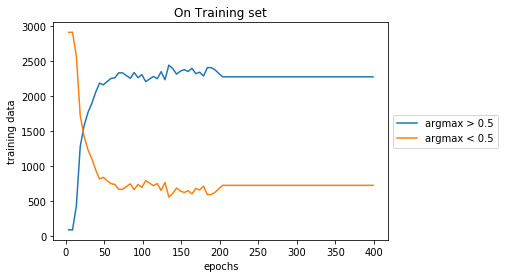

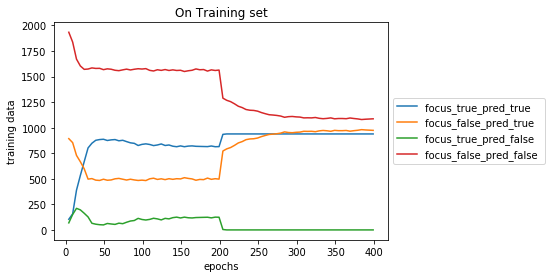

In [29]:
plt.plot(col1,col2, label='argmax > 0.5')
plt.plot(col1,col3, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.title("On Training set")
plt.show()

plt.plot(col1,col4, label ="focus_true_pred_true ")
plt.plot(col1,col5, label ="focus_false_pred_true ")
plt.plot(col1,col6, label ="focus_true_pred_false ")
plt.plot(col1,col7, label ="focus_false_pred_false ")
plt.title("On Training set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.show()

In [30]:
df_test

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,24,976,31,315,21,633
1,9,35,965,47,318,62,573
2,14,171,829,141,266,70,523
3,19,429,571,202,247,67,484
4,24,535,465,254,211,54,481
...,...,...,...,...,...,...,...
75,379,757,243,343,298,0,359
76,384,757,243,343,302,0,355
77,389,757,243,343,297,0,360
78,394,757,243,343,298,0,359


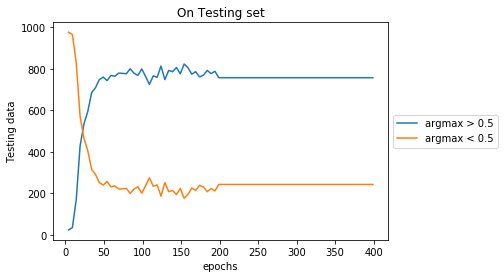

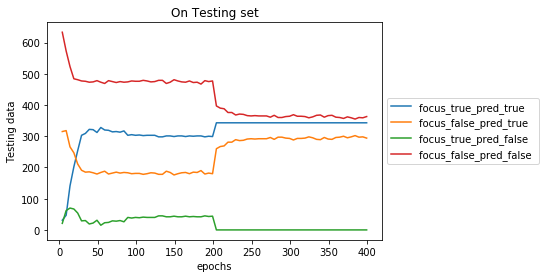

In [31]:
plt.plot(col1,col8, label='argmax > 0.5')
plt.plot(col1,col9, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.title("On Testing set")
plt.show()

plt.plot(col1,col10, label ="focus_true_pred_true ")
plt.plot(col1,col11, label ="focus_false_pred_true ")
plt.plot(col1,col12, label ="focus_true_pred_false ")
plt.plot(col1,col13, label ="focus_false_pred_false ")
plt.title("On Testing set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.show()

In [32]:
print(x[0])

[-7.612267   9.5813581]


In [33]:
for i in range(9):
    print(x[0,2*i:2*i+2])

[-7.612267   9.5813581]
[]
[]
[]
[]
[]
[]
[]
[]


In [34]:
idx[0]

array([False, False, False, ..., False, False, False])

In [35]:
idx[0][:250]

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,